##Description
At Shopee, bank transfer is a payment method in most countries. When a buyer chooses to place an order using bank transfer, he/she is supposed to make the transfer within 2 days after he/she places the order.

After he/she makes the transfer, Shopee will receive a bank statement from the bank and Shopee needs to compare and match the bank statement with the checkout information in order to confirm that this particular order has been paid. This process is called payment matching.

Two criteria need to be met in order to match a bank statement with a checkout:

Amount match: Statement amount equals checkout amount.
Name match: Statement description “matches” checkout buyer name (Note: statement description usually contains buyer name)
A proper match occurs when both the amount and the name matches on both bank statement and checkout list.

Task
Based on the two criteria, please match the Bank Statement IDs to the Checkout IDs. Please note that in the dataset provided, there are unique matches of each bank statement and checkout

Data Description
bank_statement.csv:

stmt_id: Bank statement ID
stmt_amount: Bank statement amount
description: Statement description received from bank. It is supposed to be matched to checkout buyer name.
checkout.csv:

ckt_id: Checkout ID
ckt_amount: Checkout amount
buyer_name: Buyer name that buyer fills in during checkout. It is supposed to be matched to bank statement description.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
dfpay = pd.read_csv('drive/My Drive/bank_statement.csv')
dfcek = pd.read_csv('drive/My Drive/checkout.csv')
frames = [dfpay,dfcek]


In [9]:
dfpay.head()

,stmt_id,stmt_amount,desc
0,1,100.00,INSTANT TRANSFER BAW CGANBAWI YIWHI * LEZC ...
1,2,23.77,WOOG CARIZA NIWSI YO
2,3,18.00,ZOMAZAW MABIX ATMA * BUGW * KZBUGW - TRANSFER...
3,4,21.87,TRANSFER GO LA/FA AHHA PUYIMA * YEBF ...
4,5,53.68,INSTANT TRANSFER FABZUN WIQAT JIW FA* TEGF ...


In [10]:
dfcek.head()

,ckt_id,ckt_amount,buyer_name
0,1,20.00,SAVMUEJICE EPHOCP
1,2,14.91,LUHALLAK ZGANFAP HAIQAW VIP LOHK. CIQTI
2,3,13.20,SUQ UNAISIE
3,4,36.90,GOZK BIHKAUT LIV LATAPI
4,7,26.29,HUY ZABIRAN HATIZAN WIHMI IRYIZ


In [12]:
frames = pd.concat([dfpay, dfcek] ,axis=1) 
frames.head()

,stmt_id,stmt_amount,desc,ckt_id,ckt_amount,buyer_name
0,1,100.00,INSTANT TRANSFER BAW CGANBAWI YIWHI * LEZC ...,1,20.00,SAVMUEJICE EPHOCP
1,2,23.77,WOOG CARIZA NIWSI YO,2,14.91,LUHALLAK ZGANFAP HAIQAW VIP LOHK. CIQTI
2,3,18.00,ZOMAZAW MABIX ATMA * BUGW * KZBUGW - TRANSFER...,3,13.20,SUQ UNAISIE
3,4,21.87,TRANSFER GO LA/FA AHHA PUYIMA * YEBF ...,4,36.90,GOZK BIHKAUT LIV LATAPI
4,5,53.68,INSTANT TRANSFER FABZUN WIQAT JIW FA* TEGF ...,7,26.29,HUY ZABIRAN HATIZAN WIHMI IRYIZ


In [ ]:
dfpay.head()

,stmt_id,stmt_amount,desc
0,1,100.00,INSTANT TRANSFER BAW CGANBAWI YIWHI * LEZC ...
1,2,23.77,WOOG CARIZA NIWSI YO
2,3,18.00,ZOMAZAW MABIX ATMA * BUGW * KZBUGW - TRANSFER...
3,4,21.87,TRANSFER GO LA/FA AHHA PUYIMA * YEBF ...
4,5,53.68,INSTANT TRANSFER FABZUN WIQAT JIW FA* TEGF ...


In [ ]:
dfcek.head()

,ckt_id,ckt_amount,buyer_name
0,1,20.00,SAVMUEJICE EPHOCP
1,2,14.91,LUHALLAK ZGANFAP HAIQAW VIP LOHK. CIQTI
2,3,13.20,SUQ UNAISIE
3,4,36.90,GOZK BIHKAUT LIV LATAPI
4,7,26.29,HUY ZABIRAN HATIZAN WIHMI IRYIZ


In [ ]:
dfpay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   stmt_id      240000 non-null  int64  
 1   stmt_amount  240000 non-null  float64
 2   desc         240000 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 5.5+ MB


In [ ]:
dfpay.isnull().sum()

stmt_id        0
stmt_amount    0
desc           0
dtype: int64

In [ ]:
dfpay.describe

<bound method NDFrame.describe of         stmt_id  stmt_amount                                               desc
0             1       100.00  INSTANT TRANSFER    BAW CGANBAWI YIWHI * LEZC ...
1             2        23.77                              WOOG CARIZA NIWSI YO 
2             3        18.00  ZOMAZAW MABIX ATMA *  BUGW * KZBUGW - TRANSFER...
3             4        21.87  TRANSFER GO LA/FA   AHHA PUYIMA        * YEBF ...
4             5        53.68  INSTANT TRANSFER    FABZUN WIQAT JIW FA* TEGF ...
...         ...          ...                                                ...
239995   239996        45.63                       RV WC  XUH AQLIXA GIXYI WAX 
239996   239997        63.30  TRANSFER RO MA/BA   EYEKIA AT GXAZMIB  * YELB ...
239997   239998         9.76  INSTANT TRANSFER    PUZ JATITI WJAJIZAJ* TEDW ...
239998   239999       145.00  WUVIJA XAJVISA FISD* SURWISZ POYER * AKSURWISZ...
239999   240000        30.28  WEE BIAJ SUI       * BCC QD-SHOPEE LV XALDZ TR...

[2400

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


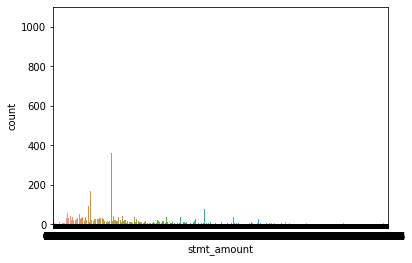

In [ ]:
sns.countplot(dfpay['stmt_amount'])

In [ ]:
dfcek.tail()

,ckt_id,ckt_amount,buyer_name
239995,329026,15.00,VAQFILAPA JIPTI NORABI
239996,329027,70.39,JIQI CUWAIVAC FIBQI IFVACIW
239997,329030,35.08,MFAFHIYAB JIYVI MFAQMUTTIY
239998,329031,20.62,VAHID DUBRQAVIBA JH FOQL ANAD
239999,329032,16.77,HAGOUF GOJBAQ


In [ ]:
dfcek.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ckt_id      240000 non-null  int64  
 1   ckt_amount  240000 non-null  float64
 2   buyer_name  240000 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 5.5+ MB


In [ ]:
frames.head()

,stmt_id,stmt_amount,desc,ckt_id,ckt_amount,buyer_name
0,1,100.00,INSTANT TRANSFER BAW CGANBAWI YIWHI * LEZC ...,1,20.00,SAVMUEJICE EPHOCP
1,2,23.77,WOOG CARIZA NIWSI YO,2,14.91,LUHALLAK ZGANFAP HAIQAW VIP LOHK. CIQTI
2,3,18.00,ZOMAZAW MABIX ATMA * BUGW * KZBUGW - TRANSFER...,3,13.20,SUQ UNAISIE
3,4,21.87,TRANSFER GO LA/FA AHHA PUYIMA * YEBF ...,4,36.90,GOZK BIHKAUT LIV LATAPI
4,5,53.68,INSTANT TRANSFER FABZUN WIQAT JIW FA* TEGF ...,7,26.29,HUY ZABIRAN HATIZAN WIHMI IRYIZ


In [14]:
y = frames.loc[dfpay['stmt_amount'] == dfcek['ckt_amount' ]]
y

,stmt_id,stmt_amount,desc,ckt_id,ckt_amount,buyer_name
88,89,29.03,SHOPEE WIOX ZQAQILAD PID W* * YW -,119,29.03,CTEAT FEE FEPJ
4605,4606,13.03,NAP PUV TAVMAPAM KI* KALU SEBAM NAP TAVMAPAM *...,6286,13.03,BATQECCA CIBUS
7409,7410,28.00,A INSTANT QOFTRANSFERN CFAIYUS AVUAY G,10123,28.00,GOPM ATTIW XIL GOPM LAHID
9479,9480,36.00,CELIPA CELIPA ECGIA CIP QIC,12953,36.00,LOMALLAC GMUTJI SIW GADDEM
10022,10023,52.00,A INSTANT VMETRANSFERQLEA AWAS,13716,52.00,LIO REE CIV
...,...,...,...,...,...,...
218311,218312,60.00,A INSTANT DULTRANSFERUR TAZEHAH KIDZI,299254,60.00,GINALCEEWI TAHALAHR
228328,228329,20.00,SAJAXUQ HUQIJA KISX* * NL - TRANSFER TO A/C,312963,20.00,VUDAVVAZ BAQIM KIL AKZUC ABIB
233567,233568,13.80,BUTABAK FIR BUKA * SHOPEE BOFIME * AB BOFIME -,320144,13.80,CEDEGA EILAG AWAR CIWRAI
234911,234912,69.00,TRANSFER HO WA/YA FUVUZ YXARIBA TIFHI* KENY ...,321973,69.00,NOCQ IHCAN ANIGUR FIW ANIG


In [17]:
y.to_csv('my_submission.csv', index=False)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
